In [8]:
from tensorflow.keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [9]:
data = pd.read_csv('Dataset1.csv')



data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
print(data.isnull().sum())

#print(data_full.info())
print(data.shape)

#print(data.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data.describe())
#print(data_full['class'] < 0.0)

y = data["isFake"]
X = data.drop("isFake", axis=1)


userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64
(1165, 9)


In [3]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(1165, 1, 8)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 72)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()

model.add(LSTM(512,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64 , kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))






model.add(layers.Dense(1, activation='sigmoid'))
# FIT / TRAIN model

model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=25, epochs=50,validation_data=(X_test,y_test) )

X_train:  (815, 1, 8)
X_test:  (350, 1, 8)
y_train:  (815,)
y_test:  (350,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7438 - loss: 0.8241 - val_accuracy: 0.8400 - val_loss: 0.6073
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8407 - loss: 0.5545 - val_accuracy: 0.8971 - val_loss: 0.3707
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9083 - loss: 0.3783 - val_accuracy: 0.9229 - val_loss: 0.2732
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9107 - loss: 0.3042 - val_accuracy: 0.9371 - val_loss: 0.2449
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9218 - loss: 0.2635 - val_accuracy: 0.9457 - val_loss: 0.2017
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9379 - loss: 0.2269 - val_accuracy: 0.9429 - val_loss: 0.2201
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9149 - loss: 0.2876 - val_accuracy: 0.9314 - val_loss: 0.1726
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9257 - loss: 0.2214 - val_accuracy: 0.9514 - v

In [4]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9624 - loss: 0.1258
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.09260436147451401, 0.9742857217788696]


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [5]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
[0.66 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.76 0.   0.   0.99 0.   0.97 0.   0.   0.   0.   0.   1.   0.
 1.   0.   0.   0.   0.   0.   0.   0.   0.16 0.   0.   0.75 0.   0.
 0.   0.   0.   0.1  1.   0.   0.   0.   0.93 0.   0.   0.   0.   1.
 0.   0.   0.   0.49 0.   0.   0.84 0.   0.01 0.   0.   0.   0.   0.05
 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.5  0.37 0.   0.   0.01 0.   0.   0.   0.   0.   0.96 0.01 0.
 0.   1.   0.   0.01 0.62 0.01 0.   0.   0.05 0.   0.62 0.   0.02 0.
 0.   0.09 1.   0.91 0.95 0.59 0.   0.16 0.07 0.01 0.91 0.   0.02 0.
 0.   0.63 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.87
 0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.05 1.   0.
 0.   0.9  0.   0.   0.   0.   0.   0.   0.81 0.   0.   0.   0.   0.
 0.99 0.   0.   0.   0.   0.   0.   0.36 0.85 0.99 1.   0.02 0.   0.
 0.06 0.01 0.   0.   0.   0.   0.99 0.   0.99 0.   0.36 0. 

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
# Precision: tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
print('F1 score: %f' % f1)


Accuracy: 0.974286
Recall: 0.946429
Precision: 0.898305
F1 score: 0.921739


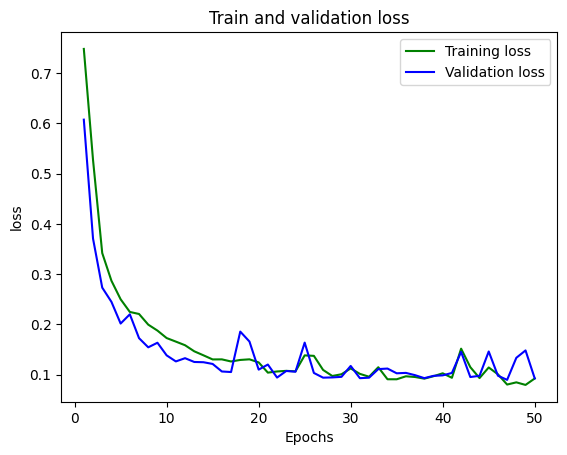

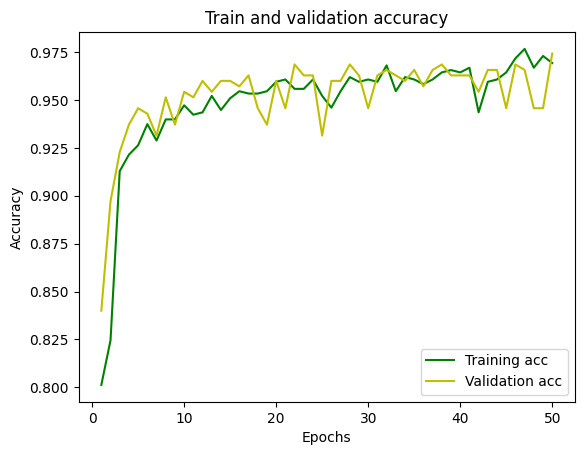

In [7]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()